In [1]:
import requests
import time
import pandas as pd
from config import email, key
import matplotlib.pyplot as plt
import json

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
base_url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson"
times_url = "&starttime=1990-01-01"
magnitude_url ="&minmagnitude=5.5"
geometry_url = "&minlatitude=25&maxlatitude=50&minlongitude=-125&maxlongitude=-65"

search = requests.get(base_url + times_url + magnitude_url + geometry_url)
response = search.json()

#print(json.dumps(response, indent=4, sort_keys=True))

response

{'type': 'FeatureCollection',
 'metadata': {'generated': 1571099087000,
  'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=1990-01-01&minmagnitude=5.5&minlatitude=25&maxlatitude=50&minlongitude=-125&maxlongitude=-65',
  'title': 'USGS Earthquakes',
  'status': 200,
  'api': '1.8.1',
  'count': 98},
 'features': [{'type': 'Feature',
   'properties': {'mag': 5.5,
    'place': '15km ESE of Little Lake, CA',
    'time': 1562384873420,
    'updated': 1569508224040,
    'tz': -480,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ci38457687',
    'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ci38457687&format=geojson',
    'felt': 32,
    'cdi': 7.1,
    'mmi': 4.916,
    'alert': None,
    'status': 'reviewed',
    'tsunami': 0,
    'sig': 488,
    'net': 'ci',
    'code': '38457687',
    'ids': ',ci38457687,us70004bpa,',
    'sources': ',ci,us,',
    'types': ',dyfi,focal-mechanism,geoserve,moment-tensor,nearby-cities,orig

In [3]:
earthquakes_list = []
i=0

for record in response['features']:
    identifier = response['features'][i]['id']
    mag = response['features'][i]['properties']['mag']
    url = response['features'][i]['properties']['url']
    epochtime = response['features'][i]['properties']['time']
    four_weeks_before = epochtime - 2419200000
    four_weeks_after = epochtime +2419200000
    event_date= time.strftime('%Y%m%d',  time.gmtime(epochtime/1000))
    month_before= time.strftime('%Y%m%d',  time.gmtime(four_weeks_before/1000))
    month_after = time.strftime('%Y%m%d',  time.gmtime(four_weeks_after/1000))
    converted_time = time.strftime('%H:%M:%S',  time.gmtime(epochtime/1000))
    timezone=response['features'][i]['properties']['tz']
    place = response['features'][i]['properties']['place']
    significance=response['features'][i]['properties']['sig']
    lon = response['features'][i]['geometry']['coordinates'][0]
    lat = response['features'][i]['geometry']['coordinates'][1]
    depth = response['features'][i]['geometry']['coordinates'][2]
    record_dict = {"Identifier":identifier, "Location":place, "Magnitude":mag, "Event Date":event_date,
                   "Month Before":month_before, "Month After":month_after, "Time":converted_time,"Time Zone":timezone, 
                   "Significance":significance, "Lat":lat, "Lon":lon, "Depth":depth, "Epoch Time":epochtime}
    earthquakes_list.append(record_dict)
    
    i += 1
    
earthquakes_df = pd.DataFrame(earthquakes_list)

earthquakes_df = earthquakes_df[~earthquakes_df["Location"].str.contains("Mexico")]

earthquakes_df = earthquakes_df[~earthquakes_df["Location"].str.contains("MX")].reset_index()

earthquakes_df = earthquakes_df.fillna(value="")

earthquakes_abbrev =earthquakes_df[['Location', 'Event Date', 'Magnitude']]

pd.set_option('display.max_rows', None)

earthquakes_df.head()

,index,Identifier,Location,Magnitude,Event Date,Month Before,Month After,Time,Time Zone,Significance,Lat,Lon,Depth,Epoch Time
0,0,ci38457687,"15km ESE of Little Lake, CA",5.50,20190706,20190608,20190803,03:47:53,-480,488,35.901167,-117.749500,5.04,1562384873420
1,1,ci38457511,2019 Ridgecrest Earthquake Sequence,7.10,20190706,20190608,20190803,03:19:53,-480,1596,35.769500,-117.599333,8.00,1562383193040
2,2,ci38443183,"11km SW of Searles Valley, CA",6.40,20190704,20190606,20190801,17:33:49,-480,1460,35.705333,-117.503833,10.50,1562261629000
3,3,nc73201181,"6km SSW of Petrolia, CA",5.58,20190623,20190526,20190721,03:53:02,-480,1139,40.273500,-124.300333,9.44,1561261982890
4,5,us10009757,"11km SE of Lincoln, Montana",5.80,20170706,20170608,20170803,06:30:17,-420,1278,46.881100,-112.575300,12.18,1499322617000


In [4]:
earthquakes_abbrev

,Location,Event Date,Magnitude
0,"15km ESE of Little Lake, CA",20190706,5.50
1,2019 Ridgecrest Earthquake Sequence,20190706,7.10
2,"11km SW of Searles Valley, CA",20190704,6.40
3,"6km SSW of Petrolia, CA",20190623,5.58
4,"11km SE of Lincoln, Montana",20170706,5.80
5,"28km SW of Hawthorne, Nevada",20161228,5.50
6,"26km SW of Hawthorne, Nevada",20161228,5.60
7,"27km SW of Hawthorne, Nevada",20161228,5.60
8,"14km NW of Pawnee, Oklahoma",20160903,5.80
9,"40km SW of Ferndale, California",20150128,5.72


# Select an EARTHQUAKE from list to Analyze (by index number):

In [5]:
earthquake = int(input("Select earthquake by index:  "))

Select earthquake by index:  10


In [38]:
# base_url finds air quality readings by Box

base_url = "https://aqs.epa.gov/data/api/dailyData/byBox?"

#parameters for byBox for CRITERIA Pollutants 
#42401="Sulfur Dioxide" 
#42602="Nitrogen Dioxide"
#42201="Ozone"
#42101 = "Carbon Monoxide"

begin = earthquakes_df.iloc[earthquake, 5]
end = earthquakes_df.iloc[earthquake, 6]
minlat=earthquakes_df.iloc[earthquake,10]-1
maxlat=earthquakes_df.iloc[earthquake,10]+1
minlon=earthquakes_df.iloc[earthquake,11]-1
maxlon=earthquakes_df.iloc[earthquake,11]+1
earthquake_location=earthquakes_df.iloc[earthquake,2]
event_date =earthquakes_df.iloc[earthquake, 4]

param_url = "param=42401,42602,44201,42101,81102,85129,88101,14129"
date_range_url = f"&bdate={begin}&edate={end}"
geometry_url = f"&minlat={minlat}&maxlat={maxlat}&minlon={minlon}&maxlon={maxlon}"

url = (base_url + param_url + "&email=" + email + "&key=" + key + date_range_url + geometry_url)

In [39]:
# Perform the search, jsonify the results, and store the data as "response"

print(color.BOLD + color.RED + f"Searching for data for Earthquake from location: {earthquake_location}.  Date of event: {event_date}." + color.END)

search = requests.get(url)
response = search.json()
response

Searching for data for Earthquake from location: South Napa.  Date of event: 20140824.


{'Header': [{'status': 'Success',
   'request_time': '2019-10-14T21:12:44-04:00',
   'url': 'https://aqs.epa.gov/data/api/dailyData/byBox?param=42401,42602,44201,42101,81102,85129,88101,14129&email=ronneimark@hotmail.com&key=tawnybird31&bdate=20140727&edate=20140921&minlat=37.2151667&maxlat=39.2151667&minlon=-123.3123333&maxlon=-121.3123333',
   'rows': 20913}],
 'Data': [{'state_code': '06',
   'county_code': '055',
   'site_number': '0003',
   'parameter_code': '81102',
   'poc': 2,
   'latitude': 38.310942,
   'longitude': -122.296189,
   'datum': 'WGS84',
   'parameter': 'PM10 Total 0-10um STP',
   'sample_duration': '24 HOUR',
   'pollutant_standard': 'PM10 24-hour 2006',
   'date_local': '2014-09-20',
   'units_of_measure': 'Micrograms/cubic meter (25 C)',
   'event_type': 'None',
   'observation_count': 1,
   'observation_percent': 100.0,
   'validity_indicator': 'Y',
   'arithmetic_mean': 10.0,
   'first_max_value': 10.0,
   'first_max_hour': 0,
   'aqi': 9,
   'method_code': '

In [53]:
# iterate through the json data and establish a dataframe of the relevant fields

record_list = []
i=0

for record in response['Data']:
    site = response['Data'][i]['local_site_name']
    station = response['Data'][i]['site_number']
    parameter = response['Data'][i]['parameter']
    date = response['Data'][i]['date_local']
    #time = response['Data'][i]['time_local']
    #measurement = response['Data'][i]['sample_measurement']
    measurement = response['Data'][i]['arithmetic_mean']
    measurement_unit = response['Data'][i]['units_of_measure']
    event_type=response['Data'][i]["event_type"]
    lon = response['Data'][i]['longitude']
    lat = response['Data'][i]['latitude']
    record_dict = {"Parameter":parameter,"Date":date,"Station":station,"Site":site, "Lat":lat,"Lon":lon,
                   "Measurement":measurement, "Unit":measurement_unit,"Event Type":event_type}
    record_list.append(record_dict)

    i += 1
    
record_df = pd.DataFrame(record_list)

# also create dataframe grouped by Parameter and Collection Site

recordgroupby_df = record_df[['Parameter', 'Date', 'Measurement']]

recordgroupby_df = recordgroupby_df.groupby(['Parameter','Date'],as_index=False).mean()


recordbybox_df = record_df[['Site','Station','Date','Parameter','Lat','Lon','Measurement','Unit']]

recordbybox_df = recordbybox_df.sort_values(by=['Site','Date','Parameter'])

# save dataframes to a csv file. 

event_date =earthquakes_df.iloc[earthquake, 4]
location = earthquakes_df.iloc[earthquake, 2]
record_df.to_csv(f"DataFiles/{event_date}-{location}.csv")
recordbybox_df.to_csv(f"DataFiles/{event_date}-{location}_bySite.csv")
recordgroupby_df.to_csv(f"DataFiles/{event_date}-{location}_byPollutant.csv")
recordgroupby_df


,Parameter,Date,Measurement
0,Carbon monoxide,2014-07-27,0.245144
1,Carbon monoxide,2014-07-28,0.255500
2,Carbon monoxide,2014-07-29,0.261605
3,Carbon monoxide,2014-07-30,0.264684
4,Carbon monoxide,2014-07-31,0.278740
5,Carbon monoxide,2014-08-01,0.291625
6,Carbon monoxide,2014-08-02,0.247161
7,Carbon monoxide,2014-08-03,0.227540
8,Carbon monoxide,2014-08-04,0.249537
9,Carbon monoxide,2014-08-05,0.287081


In [ ]:
LeadTSPRecordDates = recordbybox_df[recordbybox_df["Parameter"]=="Lead (TSP) LC"]

LeadTSPPivot = pd.pivot_table(LeadTSPRecordDates, values="Measurement", index = ["Station", "Site"], 
                             columns = ["Date"])

LeadTSPPivot.to_csv(f"DataFiles/{event_date}-{location}_Sulfur.csv")
LeadTSPPivot

In [56]:
LeadTSPRecordDates = recordbybox_df[recordbybox_df["Parameter"]=="Lead (TSP) LC"]

LeadTSPPivot = pd.pivot_table(LeadTSPRecordDates, values="Measurement", index = ["Station", "Site"], 
                             columns = ["Date"])

LeadTSPPivot.to_csv(f"DataFiles/{event_date}-{location}_Sulfur.csv")
LeadTSPPivot

,Date,2014-07-28,2014-08-03,2014-08-09,2014-08-15,2014-08-21,2014-08-27,2014-09-02,2014-09-08,2014-09-14,2014-09-20
Station,Site,,,,,,,,,,
2010,Palo Alto Airport,0.074,0.098,0.091,0.097,0.086,0.08,0.092,0.105,0.107,0.152
2011,Reid Hillview Airport,0.043,0.031,0.053,0.087,0.056,0.08,0.043,0.100,0.053,0.069


In [57]:
LeadPMRecordDates = recordbybox_df[recordbybox_df["Parameter"]=="Lead PM10 LC FRM/FEM"]

LeadPMPivot = pd.pivot_table(LeadPMRecordDates, values="Measurement", index = ["Station", "Site"], 
                             columns = ["Date"])

LeadPMPivot.to_csv(f"DataFiles/{event_date}-{location}_Sulfur.csv")
LeadPMPivot

,Date,2014-07-28,2014-08-03,2014-08-09,2014-08-15,2014-08-21,2014-08-27,2014-09-02,2014-09-08,2014-09-14,2014-09-20
Station,Site,,,,,,,,,,
0005,San Jose - Jackson,0.0013,0.0009,0.0008,0.0023,0.0017,0.0028,0.0017,0.0013,0.0015,0.0015
0006,Sacramento-Del Paso Manor,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0010,0.0000,0.0000,0.0000


In [41]:
SulfurDioxideRecordDates = recordbybox_df[recordbybox_df["Parameter"]=="Sulfur dioxide"]

SulfurPivot = pd.pivot_table(SulfurDioxideRecordDates, values="Measurement", index = ["Station", "Site"], 
                             columns = ["Date"])

SulfurPivot.to_csv(f"DataFiles/{event_date}-{location}_Sulfur.csv")
SulfurPivot

Date                               2014-07-27  2014-07-28  2014-07-29  \
Station Site                                                            
0002    Concord                      0.555519    0.294048    0.895455   
0004    Vallejo                      0.281169    0.183766    0.272078   
0005    San Jose - Jackson           0.435714    0.283928    0.390476   
0006    Richmond - 7th St.          -0.095031   -0.078416    0.096212   
        Sacramento-Del Paso Manor         NaN    1.079388    1.293390   
0011    Oakland West                 0.059415    0.080195    0.724351   
1001    Crockett - Kendall Ave       2.532453    2.026708    2.094254   
1002    Bethel Island                1.879221    1.867532    1.726623   
1004    San Pablo                    0.469805    0.467532    0.562500   
2001    Martinez - Jones St.         2.208075    1.722360    1.661801   

Date                               2014-07-30  2014-07-31  2014-08-01  \
Station Site                                                            
0002    Concord                      1.498701    0.881169    1.242424   
0004    Vallejo                      0.213637    0.285119    0.360606   
0005    San Jose - Jackson           0.374405    0.401190    0.394643   
0006    Richmond - 7th St.          -0.034627   -0.125310   -0.101398   
        Sacramento-Del Paso Manor    1.584028    1.820139    1.780903   
0011    Oakland West                 1.831548    0.124026    0.122349   
1001    Crockett - Kendall Ave       2.325932    2.685404    2.636491   
1002    Bethel Island                1.823333    1.557143    1.671212   
1004    San Pablo                    0.397403    0.382468    0.400379   
2001    Martinez - Jones St.         2.206522    2.224534    2.607143   

Date                               2014-08-02  2014-08-03  2014-08-04  \
Station Site                                                            
0002    Concord                      0.276623    0.211364    0.205519   
0004    Vallejo                      0.250000    0.221754    0.323214   
0005    San Jose - Jackson           0.228572    0.135714    0.097619   
0006    Richmond - 7th St.          -0.204348   -0.100777    1.868939   
        Sacramento-Del Paso Manor    1.623610    1.468056    1.267014   
0011    Oakland West                 0.014935   -0.002273    0.002273   
1001    Crockett - Kendall Ave       1.534627    1.397205    1.475621   
1002    Bethel Island                1.284740    0.687337    0.829870   
1004    San Pablo                    0.369805    0.576623    1.077922   
2001    Martinez - Jones St.         1.674845    1.356832    1.354658   

Date                               2014-08-05  ...  2014-09-12  2014-09-13  \
Station Site                                   ...                           
0002    Concord                      1.116234  ...    2.799242    1.460714   
0004    Vallejo                      0.262662  ...    0.818939    0.467532   
0005    San Jose - Jackson           0.122619  ...    0.419643    0.311310   
0006    Richmond - 7th St.           0.330901  ...    0.200595   -0.054658   
        Sacramento-Del Paso Manor    1.080417  ...    0.493153    0.573531   
0011    Oakland West                 1.551299  ...    0.280303    0.099675   
1001    Crockett - Kendall Ave       1.301553  ...    3.338820    3.309317   
1002    Bethel Island                0.859415  ...    1.511742    1.417208   
1004    San Pablo                    0.698701  ...    0.673485    0.521753   
2001    Martinez - Jones St.         1.578416  ...    3.228572    2.469876   

Date                               2014-09-14  2014-09-15  2014-09-16  \
Station Site                                                            
0002    Concord                      0.603247    0.319481    0.505520   
0004    Vallejo                      0.380195    0.283442    0.315686   
0005    San Jose - Jackson           0.233929    0.240476    0.375000   
0006    Richmond - 7th St.          -0.010093    1.219643    0.8114

In [42]:
NitrogenDioxideRecordDates = recordbybox_df[recordbybox_df["Parameter"]=="Nitrogen dioxide (NO2)"]

NitrogenPivot = pd.pivot_table(NitrogenDioxideRecordDates, values="Measurement", index = ["Station", "Site"], 
                             columns = ["Date"])

NitrogenPivot.to_csv(f"DataFiles/{event_date}-{location}_NitrogenDioxide.csv")
NitrogenPivot

Date                               2014-07-27  2014-07-28  2014-07-29  \
Station Site                                                            
0001    San Rafael                   4.043478    6.268182    7.017391   
0002    Concord                      3.560870    5.045455    6.773913   
        North Highlands-Blackfoot    3.869565    4.478261    5.565217   
0003    Napa                         3.626087    3.321739    4.534783   
        Yuba City                    5.408696    3.991304    5.286957   
0004    Davis-UCD Campus             4.578261    4.673913    5.891304   
        Sebastopol                   1.339130    1.617391    1.608696   
        Vallejo                      3.395652    3.686957    3.965217   
0005    San Francisco                3.047826    4.278947    6.578261   
        San Jose - Jackson           6.236364    9.436364   10.536364   
0006    Sacramento-Del Paso Manor         NaN    2.312500    3.363636   
        San Jose - Knox Avenue            NaN         NaN         NaN   
0007    Livermore                    6.521739    9.160870   11.039130   
0009    Oakland                      8.213043    9.008696   12.973913   
0010    Sacramento-1309 T Street     4.769565    4.413043    5.821739   
0011    Elk Grove-Bruceville         2.708333    4.086957    3.130435   
        Oakland West                 6.721739    8.856522   11.217391   
0012    Laney College               10.352174   15.260870   16.947826   
0014    Sacramento-Goldenland Ct.    4.500000    4.478261    5.750000   
1001    Redwood City                 4.973913    6.978261    9.686957   
1002    Bethel Island                4.047826    4.491304    4.630435   
1004    San Pablo                    4.286957    5.021739    4.888235   
2005    Patterson Pass               3.708696    5.521739    5.439130   
2007    San Ramon                    4.030435    6.421739    6.539130   
3005    Tracy-Airport                6.043478    8.695652    8.086957   

Date                               2014-07-30  2014-07-31  2014-08-01  \
Station Site                                                            
0001    San Rafael                   5.578261    6.213043    6.582609   
0002    Concord                      8.143478    8.126087    9.947826   
        North Highlands-Blackfoot    6.565217    7.086957    8.260870   
0003    Napa                         3.539130    3.734783    4.939130   
        Yuba City                    6.552174    6.930435    7.326087   
0004    Davis-UCD Campus             5.247826    6.247826    6.321739   
        Sebastopol                   1.630435    1.995652    2.726087   
        Vallejo                      4.200000    4.863636    5.386957   
0005    San Francisco                4.395652    5.421739    5.717391   
        San Jose - Jackson           9.177273   10.354545   11.222727   
0006    Sacramento-Del Paso Manor    3.791667    4.333333    5.625000   
        San Jose - Knox Avenue            NaN         NaN         NaN   
0007    Livermore                   13.317647   11.252174   11.378261   
0009    Oakland                     11.234783   10.726087   10.026087   
0010    Sacramento-1309 T Street     5.960870    5.860870    9.508696   
0011    Elk Grove-Bruceville         3.869565    3.333333    3.869565   
        Oakland West                 9.595455   10.386957   11.195652   
0012    Laney College               16.175000   18.095455   16.908696   
0014    Sacramento-Goldenland Ct.    7.285714         NaN         NaN   
1001    Redwood City                 9.047826    7.656522    9.621739   
1002    Bethel Island                5.378947    5.634783    6.686957   
1004    San Pablo                    3.643478    3.908696    4.639130   
2005    Patterson Pass               3.595652    3.421739    3.234783   
2007    San Ramon                    7.613043    7.408696    8.795652   
3005    Tracy-Airport                9.458333    8.000000    9.565217   

Date                               2014-08-02  2014-08-0

In [43]:
OzoneRecordDates = recordbybox_df[recordbybox_df["Parameter"]=="Ozone"]

OzonePivot = pd.pivot_table(OzoneRecordDates, values="Measurement", index = ["Station", "Site"], 
                             columns = ["Date"])

OzonePivot.to_csv(f"DataFiles/{event_date}-{location}_Ozone.csv")

OzonePivot

Date                                  2014-07-27  2014-07-28  2014-07-29  \
Station Site                                                               
0001    San Rafael                      0.019049    0.017821    0.017049   
0002    Concord                         0.027405    0.023005    0.029740   
        North Highlands-Blackfoot       0.038568    0.036569    0.039684   
0003    Napa                            0.021976    0.020557    0.021642   
        Yuba City                       0.036023    0.033717    0.037119   
0004    Davis-UCD Campus                0.026094    0.021908    0.026970   
        Sebastopol                      0.019632    0.017997    0.016566   
        Sutter Buttes (seasonal)        0.053496    0.048388    0.048494   
        Vallejo                         0.021637    0.020703    0.021319   
0005    Fairfield                       0.025374    0.023177    0.026047   
        San Francisco                   0.018795    0.018376    0.014160   
        San Jose - Jackson              0.024616    0.021367    0.020645   
0006    Sacramento-Del Paso Manor            NaN    0.037045    0.038378   
0007    Livermore                       0.029204    0.023491    0.026727   
0008    Ukiah-Gobbi Street              0.023994    0.022177    0.021860   
0009    Oakland                         0.016389    0.014912    0.010799   
0010    Sacramento-1309 T Street        0.034376    0.030320    0.034218   
0011    Elk Grove-Bruceville            0.028444    0.029426    0.031340   
        Oakland West                    0.017066    0.016699    0.013151   
0014    Sacramento-Goldenland Ct.       0.029925    0.029076    0.032439   
1001    Los Gatos                       0.029332    0.022637    0.024941   
        Redwood City                    0.019949    0.017186    0.014292   
1002    Bethel Island                   0.029022    0.025956    0.031482   
        Colusa-Sunrise Blvd             0.031380    0.029301    0.033111   
1003    Healdsburg-Municipal Airport    0.027910    0.018238    0.019835   
        Woodland-Gibson Road            0.029600    0.024917    0.030010   
1004    San Pablo                       0.018598    0.018765    0.015338   
2001    Hayward                         0.021102    0.017796    0.020605   
2007    San Ramon                       0.027827    0.023593    0.028809   
3001    Lakeport-Lakeport Blvd.         0.035076    0.033443    0.035361   
3003    Vacaville-Ulatis Drive          0.031250    0.027094    0.030430   
3005    Tracy-Airport                   0.037902    0.036433    0.038476   

Date                                  2014-07-30  2014-07-31  2014-08-01  \
Station Site                                                               
0001    San Rafael                      0.012016    0.016697    0.017865   
0002    Concord                         0.023594    0.024402    0.028966   
        North Highlands-Blackfoot       0.042111    0.042984    0.042924   
0003    Napa                            0.017998    0.020011    0.023518   
        Yuba City                       0.037043    0.038513    0.036963   
0004    Davis-UCD Campus                0.025109    0.025769    0.031807   
        Sebastopol                      0.014274    0.015340    0.017517   
        Sutter Buttes (seasonal)        0.052203    0.054401    0.050063   
        Vallejo                         0.018399    0.021848    0.025757   
0005    Fairfield                       0.022509    0.024150    0.029294   
        San Francisco                   0.012658    0.017962    0.019868   
        San Jose - Jackson              0.017903    0.020960    0.024096   
0006    Sacramento-Del Paso Manor       0.036461    0.037701    0.040757   
0007    Livermore                       0.015609    0.024345    0.030136   
0008    Ukiah-Gobbi Street              0.024521    0.029724    0.031459   
0009    Oakland                         0.008578    0.013437    0.017136   
0010    Sacramento-1309 T Street        0.03362

In [44]:
CORecordDates = recordbybox_df[recordbybox_df["Parameter"]=="Carbon monoxide"]

COPivot = pd.pivot_table(CORecordDates, values="Measurement", index = ["Station", "Site"], 
                             columns = ["Date"])

COPivot.to_csv(f"DataFiles/{event_date}-{location}_CarbonMonoxide.csv")

COPivot

Date                               2014-07-27  2014-07-28  2014-07-29  \
Station Site                                                            
0001    San Rafael                   0.293478    0.282386    0.280979   
0002    Concord                      0.197826    0.265341    0.333967   
        North Highlands-Blackfoot    0.127808    0.212591    0.186957   
0003    Napa                         0.449003    0.452989    0.478804   
0004    Sebastopol                   0.302174    0.302174    0.340398   
        Sutter Buttes (seasonal)     0.175000    0.106250    0.100000   
        Vallejo                      0.200000    0.206522    0.234058   
0005    San Francisco                0.236142    0.256579    0.276631   
        San Jose - Jackson           0.188182    0.207841    0.204583   
0006    Sacramento-Del Paso Manor         NaN    0.165287    0.114114   
        San Jose - Knox Avenue            NaN         NaN         NaN   
0009    Oakland                      0.193478    0.195652    0.210688   
0011    Oakland West                 0.363677    0.368116    0.402174   
0012    Laney College                0.346830    0.363858    0.410688   
0014    Sacramento-Goldenland Ct.    0.087500    0.121195    0.077083   
1001    Redwood City                 0.302174    0.329801    0.346739   
1002    Bethel Island                0.219203    0.223369    0.246920   
1004    San Pablo                    0.361685    0.372373    0.319538   

Date                               2014-07-30  2014-07-31  2014-08-01  \
Station Site                                                            
0001    San Rafael                   0.285145    0.295652    0.308515   
0002    Concord                      0.338315    0.323369    0.380888   
        North Highlands-Blackfoot    0.200000    0.204348    0.197916   
0003    Napa                         0.457337    0.468116    0.501993   
0004    Sebastopol                   0.336141    0.363858    0.370199   
        Sutter Buttes (seasonal)     0.100000    0.100000    0.100000   
        Vallejo                      0.255344    0.206629    0.200000   
0005    San Francisco                0.265942    0.274456    0.274366   
        San Jose - Jackson           0.203636    0.229129    0.240357   
0006    Sacramento-Del Paso Manor    0.117438    0.150250    0.183395   
        San Jose - Knox Avenue            NaN         NaN         NaN   
0009    Oakland                      0.193478    0.193478    0.257609   
0011    Oakland West                 0.332008    0.297826    0.327627   
0012    Laney College                0.343971    0.363258    0.374456   
0014    Sacramento-Goldenland Ct.    0.126984         NaN         NaN   
1001    Redwood City                 0.336141    0.314855    0.303986   
1002    Bethel Island                0.359210    0.400000    0.286866   
1004    San Pablo                    0.336141    0.357519    0.374456   

Date                               2014-08-02  2014-08-03  2014-08-04  \
Station Site                                                            
0001    San Rafael                   0.300000    0.297826    0.284091   
0002    Concord                      0.300000    0.300000    0.306522   
        North Highlands-Blackfoot    0.308605    0.287319    0.347011   
0003    Napa                         0.455253    0.412953    0.487047   
0004    Sebastopol                   0.338225    0.300000    0.323369   
        Sutter Buttes (seasonal)     0.100000    0.102083    0.100000   
        Vallejo                      0.200000    0.200000    0.179118   
0005    San Francisco                0.225544    0.206522    0.272373   
        San Jose - Jackson           0.181818    0.137841    0.162349   
0006    Sacramento-Del Paso Manor    0.122720    0.110042    0.150355   
        San Jose - Knox Avenue            NaN         NaN         NaN   
0009    Oakland                      0.144294    0.100000    0.169925   
0011    Oakland West                 0.295652    0.28913

In [45]:
#Extract NO2 data from the groupby

Nitrogen_Dioxide = recordgroupby_df['Parameter']=="Nitrogen dioxide (NO2)"
record_NO2 = recordgroupby_df[Nitrogen_Dioxide]
record_NO2.head()

,Parameter,Date,Measurement
77,Nitrogen dioxide (NO2),2014-07-27,4.781906
78,Nitrogen dioxide (NO2),2014-07-28,5.896111
79,Nitrogen dioxide (NO2),2014-07-29,6.969709
80,Nitrogen dioxide (NO2),2014-07-30,6.874893
81,Nitrogen dioxide (NO2),2014-07-31,6.999711


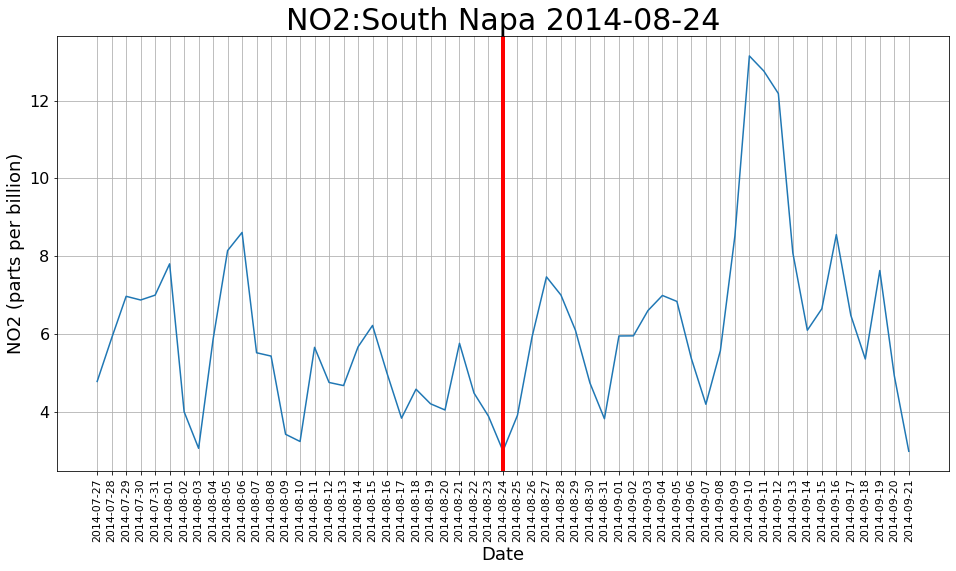

In [46]:
# Plot the NO2 data with line chart

epochtime = earthquakes_df.iloc[earthquake, 13]
aqi_event_date = time.strftime('%Y-%m-%d',  time.gmtime(epochtime/1000))
earthquake_location=earthquakes_df.iloc[earthquake,2]

plt.plot(record_NO2['Date'],record_NO2['Measurement'])
plt.title('{0}'.format("NO2:" + earthquake_location + " " + aqi_event_date), fontsize =30)
plt.xlabel("Date", fontsize = 18)
plt.ylabel("NO2 (parts per billion)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=16
plt.xticks(rotation=90)
plt.axvline(x=aqi_event_date, color='r', linewidth=4)
plt.grid()
plt.show()


In [47]:
# Extract SO2 data from the groupby dataframe

Sulfur_Dioxide = recordgroupby_df['Parameter']=="Sulfur dioxide"
record_SO2 = recordgroupby_df[Sulfur_Dioxide]
record_SO2.head()

,Parameter,Date,Measurement
305,Sulfur dioxide,2014-07-27,0.925149
306,Sulfur dioxide,2014-07-28,0.792704
307,Sulfur dioxide,2014-07-29,0.989986
308,Sulfur dioxide,2014-07-30,1.230916
309,Sulfur dioxide,2014-07-31,1.043016


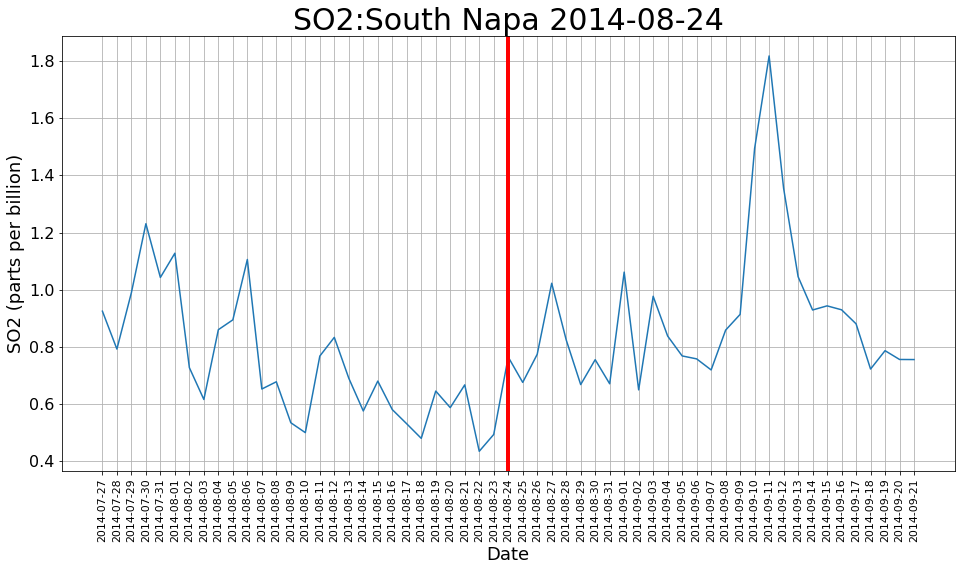

In [48]:
# Chart the SO2 Data

epochtime = earthquakes_df.iloc[earthquake, 13]
aqi_event_date = time.strftime('%Y-%m-%d',  time.gmtime(epochtime/1000))
earthquake_location=earthquakes_df.iloc[earthquake,2]

plt.plot(record_SO2['Date'],record_SO2['Measurement'])
plt.title('{0}'.format("SO2:" + earthquake_location + " " + aqi_event_date), fontsize =30)
plt.xlabel("Date", fontsize = 18)
plt.ylabel("SO2 (parts per billion)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=16
plt.xticks(rotation=90)
plt.axvline(x=aqi_event_date, color='r', linewidth=4)
plt.grid()
plt.show()

In [49]:
# Extract Ozone from the groupby dataframe

Ozone = recordgroupby_df['Parameter']=="Ozone"
record_Ozone = recordgroupby_df[Ozone]
record_Ozone.head()

,Parameter,Date,Measurement
134,Ozone,2014-07-27,0.027452
135,Ozone,2014-07-28,0.025065
136,Ozone,2014-07-29,0.026595
137,Ozone,2014-07-30,0.024315
138,Ozone,2014-07-31,0.026751


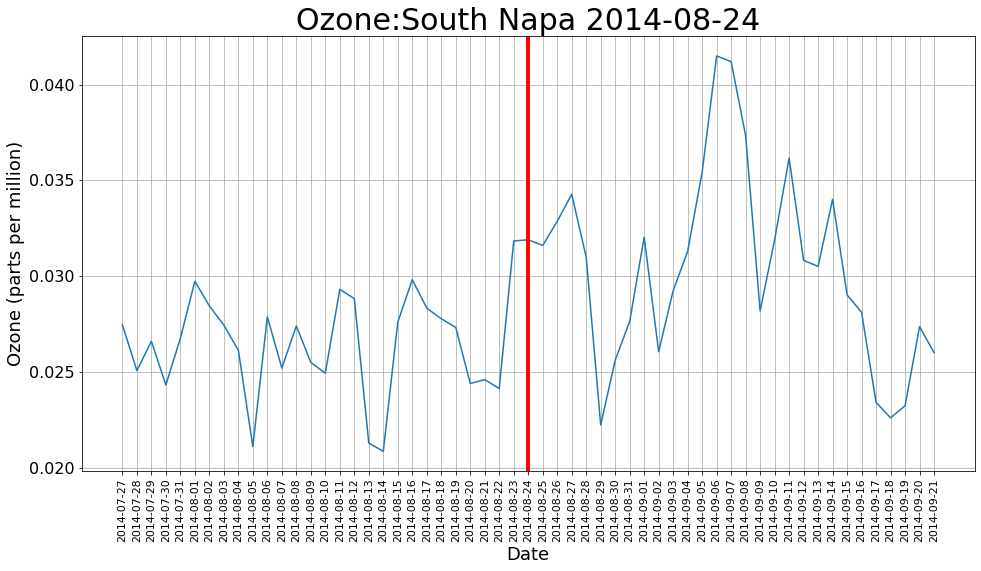

In [50]:
#Chart the Ozone Data

epochtime = earthquakes_df.iloc[earthquake, 13]
aqi_event_date = time.strftime('%Y-%m-%d',  time.gmtime(epochtime/1000))
earthquake_location=earthquakes_df.iloc[earthquake,2]

plt.plot(record_Ozone['Date'],record_Ozone['Measurement'])
plt.title('{0}'.format("Ozone:" + earthquake_location + " " + aqi_event_date), fontsize =30)
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Ozone (parts per million)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=16
plt.grid()
plt.axvline(x=aqi_event_date, color='r', linewidth=4)
plt.xticks(rotation=90)
plt.show()

In [51]:
# Extract CO from the groupby dataframe

Carbon_Monoxide = recordgroupby_df['Parameter']=="Carbon monoxide"
record_CO = recordgroupby_df[Carbon_Monoxide]
record_CO.head()

,Parameter,Date,Measurement
0,Carbon monoxide,2014-07-27,0.245144
1,Carbon monoxide,2014-07-28,0.255500
2,Carbon monoxide,2014-07-29,0.261605
3,Carbon monoxide,2014-07-30,0.264684
4,Carbon monoxide,2014-07-31,0.278740


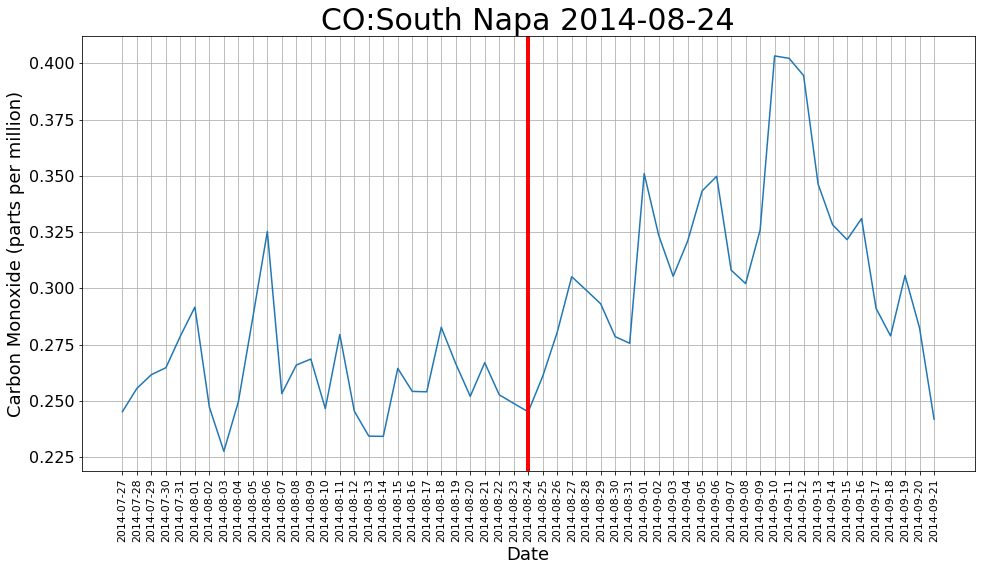

In [52]:
#Chart the Carbon Monoxide Data

epochtime = earthquakes_df.iloc[earthquake, 13]
aqi_event_date = time.strftime('%Y-%m-%d',  time.gmtime(epochtime/1000))
earthquake_location=earthquakes_df.iloc[earthquake,2]

plt.plot(record_CO['Date'],record_CO['Measurement'])
plt.title('{0}'.format("CO:" + earthquake_location + " " + aqi_event_date), fontsize =30)
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Carbon Monoxide (parts per million)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=16
plt.xticks(rotation=90)
plt.axvline(x=aqi_event_date, color='r', linewidth=4)
plt.grid()
plt.show()